<a href="https://colab.research.google.com/github/amrit100612/Internship-program_26/blob/main/Day_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Machine learning Performmance Metrrics:
---------------------------------------------

* True Positive(TP) -> Predicted Positive and Actual Positive. eg. patients has cancer , and the model correctly say they do.

* False Positive(FP)-> Predicted Positive but Actual Negative . eg. patient is healthy , but the model incorrectly say they have cancer.
---------------------------------------------

* False Negative(FN) -> Predicted negative but actually Positive.
 eg. person has cancer , but model say that they are healthy.

* True Negative(TN) -> Predicit negative and actually Negative.
. eg. Patient is healthy, and model say it correctly.
---------------------------------------------
* Precision vs Recall: Critical Trade-off
* Accuracy : Overall Correction
* F1 Score : Balanced Avg.
---------------------------------------------

* Accuraccy Trap :    
 Defination : Accuracy = (TP+TN)/ Total Pred.
====================================================


* Precision: (TP/{TP+FP}) -> TYPE 1 Error (Business) -> Spam filter, Recommendation
==================================================================

* Recall : (TP/{TP+FN}) -> TYPE 2 Error (Medical) -> Disease Screening, Fraud
===============================================================


* Specificity: Flip side of reecall

 * Specificity (True Negative Rate): (TN/ TN+FP)  
 -------------------------------------------------------


* Finding Balance : F1 Score -> F1 = 2* (Precision * Recall)/(Precision + Recall)
========================================================

-----------------------------------------------------------------

ROC Curve
AUC : Area under curve :

1.   AUC = 0.5 : Random Guess
2.   AUC = 1.0 : Perfect Pred.
3.   AUC = 0.0 : Perfectly Wrong  

-------------------------------------------------------------------------



* MAE & RMSE : Use RMSE when a single large error is unacceptable

* R2 shows the Variance of the data(Scatterness)

Condition             &         Recommendation Metric


*   DATA is imbalanceed             ==      F1 score

*   High cost of false negative   == REcall



*   HIgh cost of False positive  == Precision
*   Need probabilistic Ranking  == AUC/ Log Loss

*   Large Outlier are unacceptiable  == RMSE
*   Need simple interpretability == MAE

* KNN : Distance & Neighbor

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/sample_data/Heart_Disease_Prediction.csv')

In [ ]:
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [ ]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [ ]:
df.isnull().sum()

,0
Age,0
Sex,0
Chest pain type,0
BP,0
Cholesterol,0
FBS over 120,0
EKG results,0
Max HR,0
Exercise angina,0
ST depression,0


In [ ]:
df.value_counts()

Age  Sex  Chest pain type  BP   Cholesterol  FBS over 120  EKG results  Max HR  Exercise angina  ST depression  Slope of ST  Number of vessels fluro  Thallium  Heart Disease
77   1    4                125  304          0             2            162     1                0.0            1            3                        3         Presence         1
29   1    2                130  204          0             2            202     0                0.0            1            0                        3         Absence          1
34   0    2                118  210          0             0            192     0                0.7            1            0                        3         Absence          1
     1    1                118  182          0             2            174     0                0.0            1            0                        3         Absence          1
35   0    4                138  183          0             0            182     0                1.4            1            0                        3         Absence          1
                                                                                                                                                                                ..
41   0    3                112  268          0             2            172     1                0.0            1            0                        3         Absence          1
          2                130  204          0             2            172     0                1.4            1            0                        3         Absence          1
                           126  306          0             0            163     0                0.0            1            0                        3         Absence          1
                           105  198          0             0            168     0                0.0            1            1                        3         Absence          1
40   1    4                152  223          0             0            181     0                0.0            1            0                        7         Presence         1
Name: count, Length: 270, dtype: int64

In [ ]:
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
print("Numerical columns identified :\n", numerical_cols)

Numerical columns identified :
 ['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium']


/tmp/ipython-input-169648520.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df['BP'],palette='viridis')


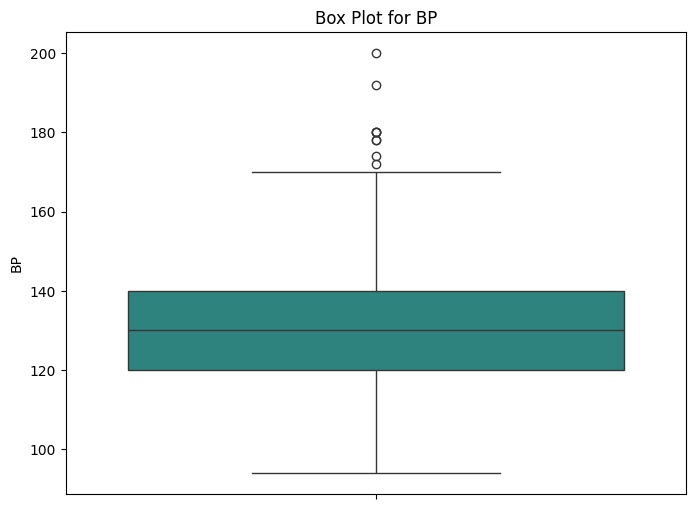

In [ ]:
from sklearn import datasets

plt.figure(figsize=(8, 6))
sns.boxplot(y=df['BP'],palette='viridis')
plt.title('Box Plot for BP')
plt.show()

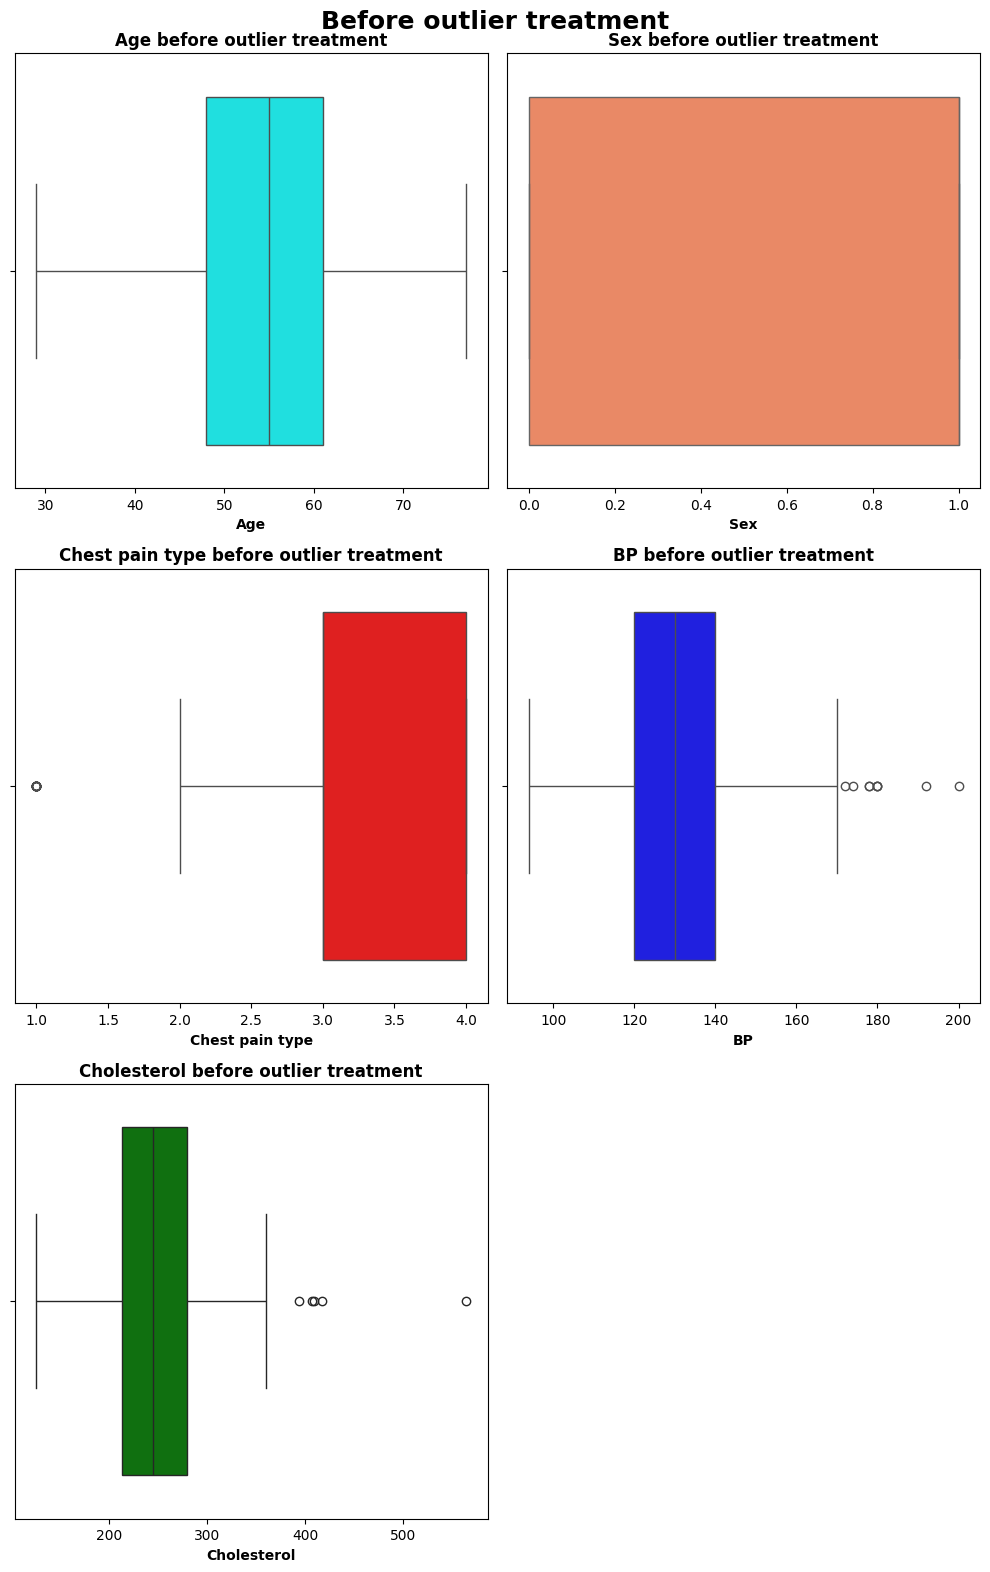

In [ ]:
fig,axes = plt.subplots(3,2,figsize = (10,16))
colors = ['cyan' , 'coral' , 'red' , 'blue' , 'green']
axes = axes.flatten()
plt.delaxes(axes[-1])

columns_for_boxplotting = numerical_cols[:5]

for index in range(len(columns_for_boxplotting)):
  sns.boxplot(x= df[columns_for_boxplotting[index]] ,ax = axes[index] , color = colors[index])
  axes[index].set_xlabel(f'{columns_for_boxplotting[index]}' , fontweight = 'bold')
  axes[index].set_title(f'{columns_for_boxplotting[index]} before outlier treatment' , fontweight = 'bold')

fig.suptitle('Before outlier treatment' , fontweight = 'bold' , fontsize = 18)
plt.tight_layout()
plt.show()

In [ ]:
for index in range(len(columns_for_boxplotting)):
  Q1 = df[columns_for_boxplotting[index]].quantile(0.25)
  Q3 = df[columns_for_boxplotting[index]].quantile(0.75)

  IQR = Q3 - Q1
  lower_limit = Q1 - 1.5 * IQR
  upper_limit = Q3 + 1.5 * IQR

  df[columns_for_boxplotting[index]] = df[columns_for_boxplotting[index]].clip(lower = lower_limit, upper = upper_limit)
print("Outlier removal accomplished!")

Outlier removal accomplished!


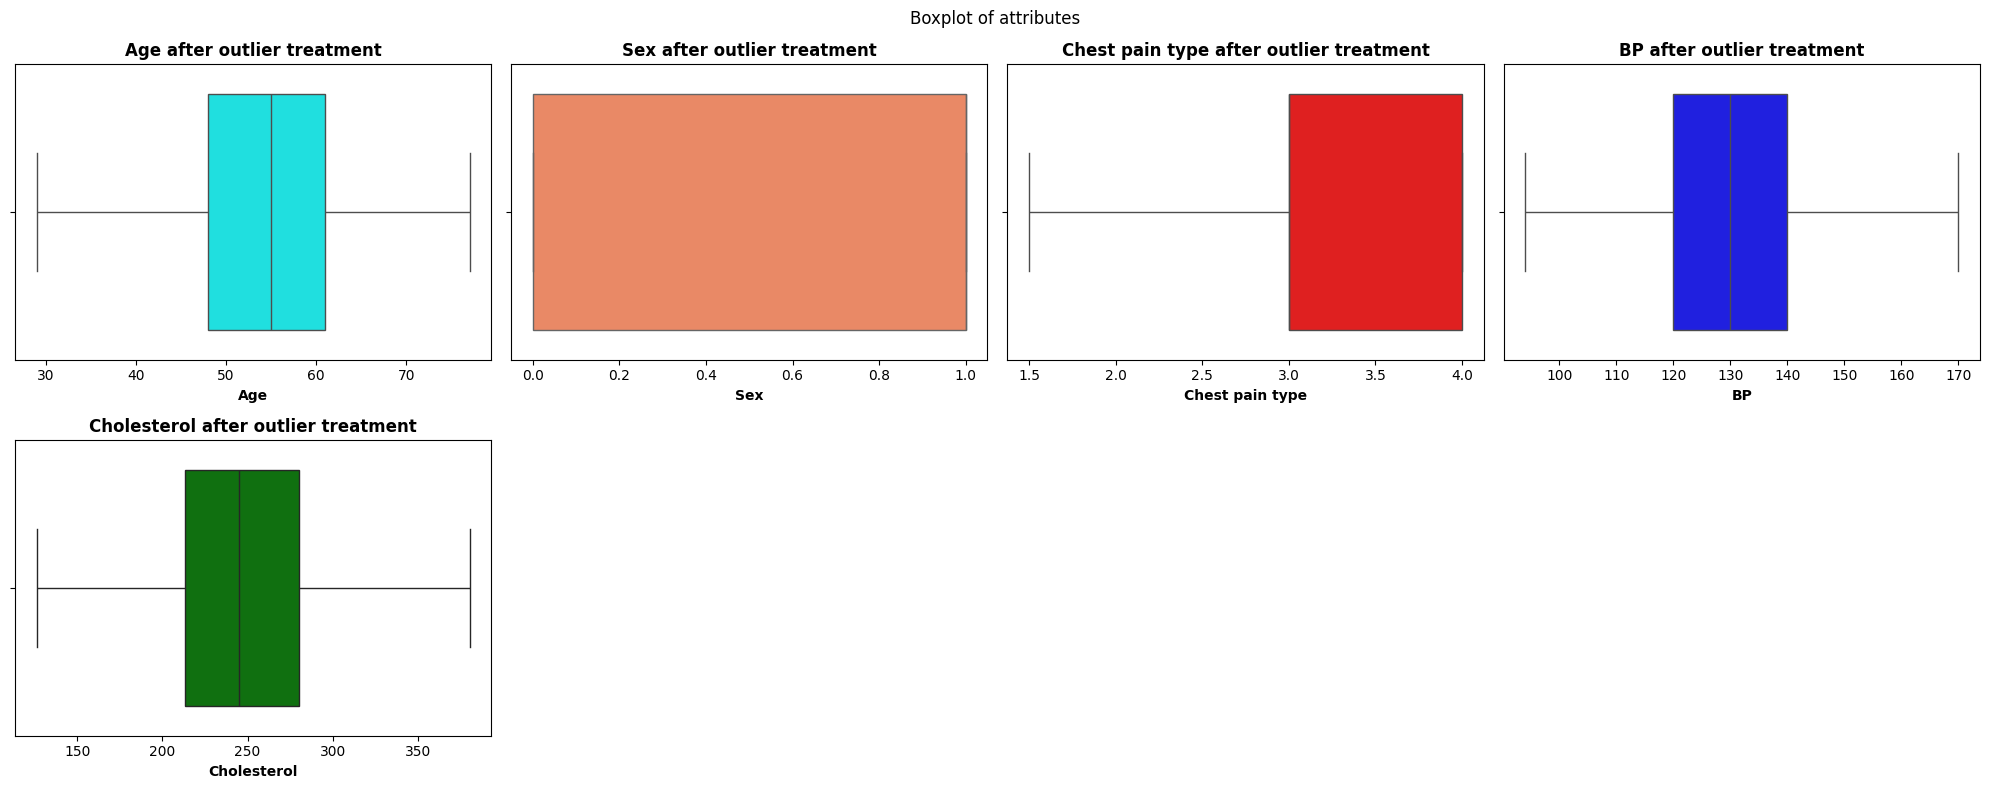

In [ ]:
import math

n_cols = 4
n_rows = math.ceil(len(columns_for_boxplotting) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
colours = ['cyan', 'coral', 'red', 'blue', 'green']
axes = axes.flatten()

for index in range(len(columns_for_boxplotting)):
  sns.boxplot(x=df[columns_for_boxplotting[index]], ax=axes[index], color=colours[index % len(colours)])
  axes[index].set_xlabel(f'{columns_for_boxplotting[index]}', fontweight='bold')
  axes[index].set_title(f'{columns_for_boxplotting[index]} after outlier treatment', fontweight='bold')


for j in range(index + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Boxplot of attributes", fontweight=18)
plt.tight_layout()
plt.show()

In [ ]:
df = pd.concat([df,pd.get_dummies(df['Thallium'],prefix='Thallium',drop_first=True,dtype=int)],axis=1)
df = df.drop(columns={'Thallium'})
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Heart Disease,Thallium_6,Thallium_7
0,70,1,4.0,130,322.0,0,2,109,0,2.4,2,3,Presence,0,0
1,67,0,3.0,115,380.5,0,2,160,0,1.6,2,0,Absence,0,1
2,57,1,2.0,124,261.0,0,0,141,0,0.3,1,0,Presence,0,1
3,64,1,4.0,128,263.0,0,0,105,1,0.2,2,1,Absence,0,1
4,74,0,2.0,120,269.0,0,2,121,1,0.2,1,1,Absence,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3.0,170,199.0,1,0,162,0,0.5,1,0,Absence,0,1
266,44,1,2.0,120,263.0,0,0,173,0,0.0,1,0,Absence,0,1
267,56,0,2.0,140,294.0,0,2,153,0,1.3,2,0,Absence,0,0
268,57,1,4.0,140,192.0,0,0,148,0,0.4,2,0,Absence,1,0


In [ ]:
df=pd.concat([df,pd.get_dummies(df['EKG results'], prefix= 'EKG results',drop_first=True,dtype=int)],axis=1)
df= df.drop(columns={'EKG results'})
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Heart Disease,Thallium_6,Thallium_7,EKG results_1,EKG results_2
0,70,1,4.0,130,322.0,0,109,0,2.4,2,3,Presence,0,0,0,1
1,67,0,3.0,115,380.5,0,160,0,1.6,2,0,Absence,0,1,0,1
2,57,1,2.0,124,261.0,0,141,0,0.3,1,0,Presence,0,1,0,0
3,64,1,4.0,128,263.0,0,105,1,0.2,2,1,Absence,0,1,0,0
4,74,0,2.0,120,269.0,0,121,1,0.2,1,1,Absence,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3.0,170,199.0,1,162,0,0.5,1,0,Absence,0,1,0,0
266,44,1,2.0,120,263.0,0,173,0,0.0,1,0,Absence,0,1,0,0
267,56,0,2.0,140,294.0,0,153,0,1.3,2,0,Absence,0,0,0,1
268,57,1,4.0,140,192.0,0,148,0,0.4,2,0,Absence,1,0,0,0


In [ ]:
df=pd.concat([df,pd.get_dummies(df['Slope of ST'], prefix= 'Slope of ST',drop_first=True,dtype=int)],axis=1)
df= df.drop(columns={'Slope of ST'})
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,Max HR,Exercise angina,ST depression,Number of vessels fluro,Heart Disease,Thallium_6,Thallium_7,EKG results_1,EKG results_2,Slope of ST_2,Slope of ST_3
0,70,1,4.0,130,322.0,0,109,0,2.4,3,Presence,0,0,0,1,1,0
1,67,0,3.0,115,380.5,0,160,0,1.6,0,Absence,0,1,0,1,1,0
2,57,1,2.0,124,261.0,0,141,0,0.3,0,Presence,0,1,0,0,0,0
3,64,1,4.0,128,263.0,0,105,1,0.2,1,Absence,0,1,0,0,1,0
4,74,0,2.0,120,269.0,0,121,1,0.2,1,Absence,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3.0,170,199.0,1,162,0,0.5,0,Absence,0,1,0,0,0,0
266,44,1,2.0,120,263.0,0,173,0,0.0,0,Absence,0,1,0,0,0,0
267,56,0,2.0,140,294.0,0,153,0,1.3,0,Absence,0,0,0,1,1,0
268,57,1,4.0,140,192.0,0,148,0,0.4,0,Absence,1,0,0,0,1,0


In [ ]:
columns_for_scaling =['Age','BP','Cholesterol','Max HR','ST depression']

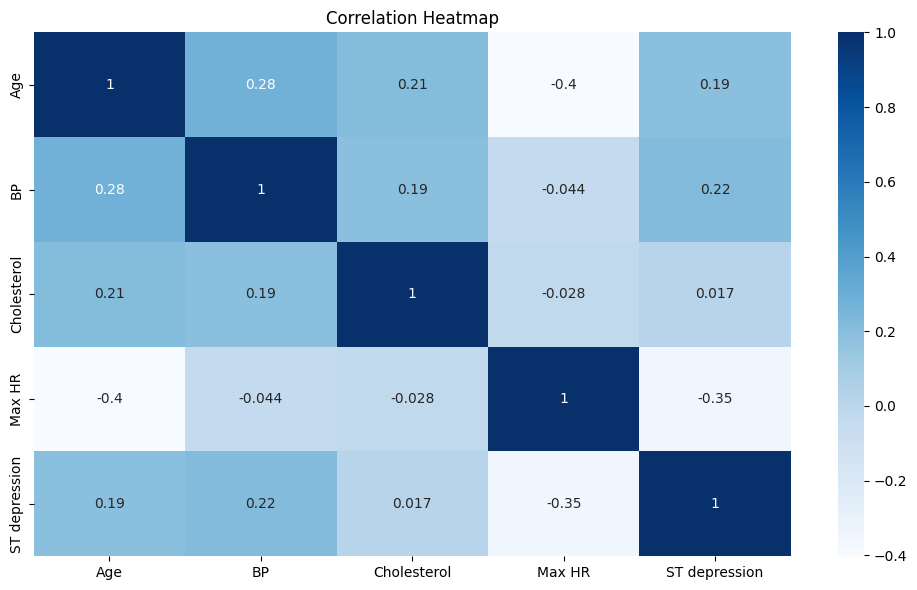

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[columns_for_scaling].corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df[columns_for_scaling]=scaler.fit_transform(df[columns_for_scaling])
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,Max HR,Exercise angina,ST depression,Number of vessels fluro,Heart Disease,Thallium_6,Thallium_7,EKG results_1,EKG results_2,Slope of ST_2,Slope of ST_3
0,1.712094,1,4.0,-0.057210,1.549364,0,-1.759208,0,1.181012,3,Presence,0,0,0,1,1,0
1,1.382140,0,3.0,-0.951808,2.784055,0,0.446409,0,0.481153,0,Absence,0,1,0,1,1,0
2,0.282294,1,2.0,-0.415049,0.261908,0,-0.375291,0,-0.656118,0,Presence,0,1,0,0,0,0
3,1.052186,1,4.0,-0.176490,0.304119,0,-1.932198,1,-0.743600,1,Absence,0,1,0,0,1,0
4,2.152032,0,2.0,-0.653609,0.430754,0,-1.240239,1,-0.743600,1,Absence,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,-0.267629,1,3.0,2.328384,-1.046654,1,0.532904,0,-0.481153,0,Absence,0,1,0,0,0,0
266,-1.147506,1,2.0,-0.653609,0.304119,0,1.008625,0,-0.918565,0,Absence,0,1,0,0,0,0
267,0.172309,0,2.0,0.539188,0.958400,0,0.143677,0,0.218706,0,Absence,0,0,0,1,1,0
268,0.282294,1,4.0,0.539188,-1.194395,0,-0.072560,0,-0.568636,0,Absence,1,0,0,0,1,0


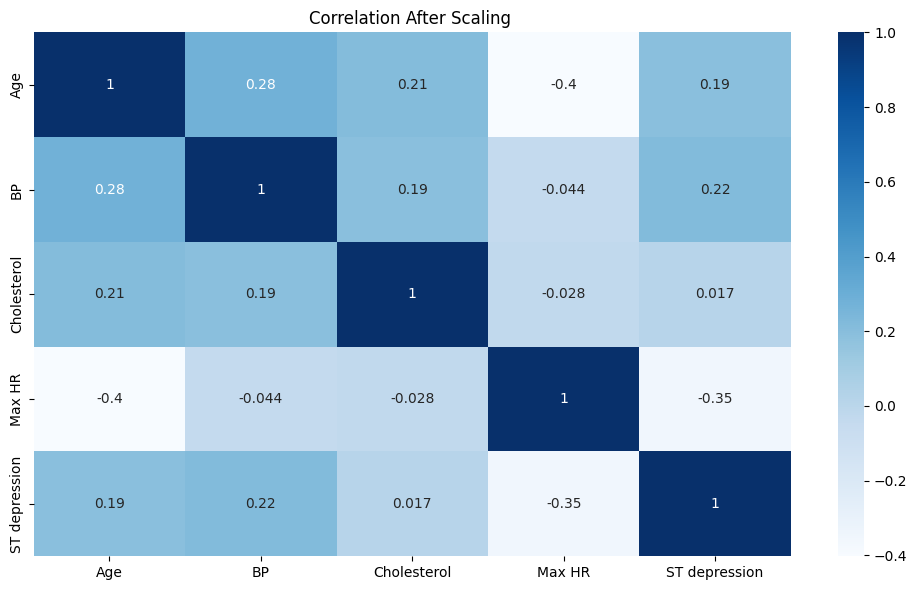

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[columns_for_scaling].corr(), annot=True, cmap='Blues')
plt.title('Correlation After Scaling ')
plt.tight_layout()
plt.show()

In [ ]:
#Splitting the dataset into test and train set
from sklearn.model_selection import train_test_split

y = df['Heart Disease']

X_train, X_test = train_test_split(df, test_size=0.2, random_state=42,stratify=y)

y_train= X_train['Heart Disease']
X_train = X_train.drop(columns=['Heart Disease'])
y_test = X_test['Heart Disease']
X_test = X_test.drop(columns=['Heart Disease'])

In [ ]:
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,Max HR,Exercise angina,ST depression,Number of vessels fluro,Heart Disease,Thallium_6,Thallium_7,EKG results_1,EKG results_2,Slope of ST_2,Slope of ST_3
0,1.712094,1,4.0,-0.057210,1.549364,0,-1.759208,0,1.181012,3,Presence,0,0,0,1,1,0
1,1.382140,0,3.0,-0.951808,2.784055,0,0.446409,0,0.481153,0,Absence,0,1,0,1,1,0
2,0.282294,1,2.0,-0.415049,0.261908,0,-0.375291,0,-0.656118,0,Presence,0,1,0,0,0,0
3,1.052186,1,4.0,-0.176490,0.304119,0,-1.932198,1,-0.743600,1,Absence,0,1,0,0,1,0
4,2.152032,0,2.0,-0.653609,0.430754,0,-1.240239,1,-0.743600,1,Absence,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,-0.267629,1,3.0,2.328384,-1.046654,1,0.532904,0,-0.481153,0,Absence,0,1,0,0,0,0
266,-1.147506,1,2.0,-0.653609,0.304119,0,1.008625,0,-0.918565,0,Absence,0,1,0,0,0,0
267,0.172309,0,2.0,0.539188,0.958400,0,0.143677,0,0.218706,0,Absence,0,0,0,1,1,0
268,0.282294,1,4.0,0.539188,-1.194395,0,-0.072560,0,-0.568636,0,Absence,1,0,0,0,1,0


In [ ]:
y_test.value_counts()

,count
Heart Disease,
Absence,30
Presence,24


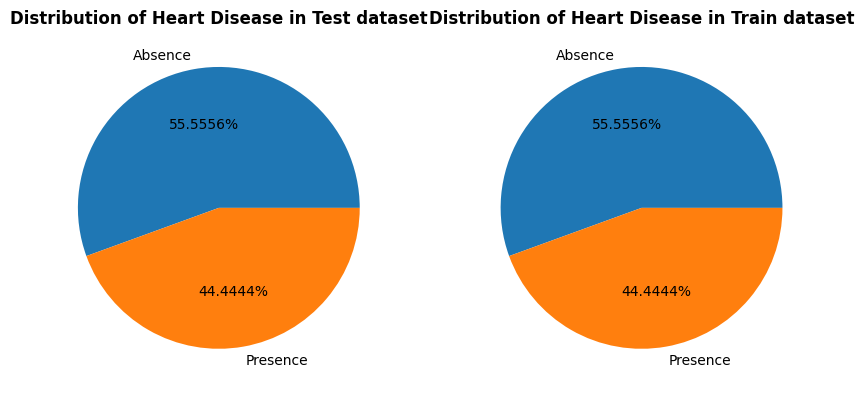

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,10))

axes[0].pie(y_train.value_counts(),labels = ['Absence','Presence'],autopct='%1.4f%%')
axes[0].set_title("Distribution of Heart Disease in Test dataset",fontweight = 'bold')

axes[1].pie(y_test.value_counts(),labels = ['Absence','Presence'],autopct='%1.4f%%')
axes[1].set_title("Distribution of Heart Disease in Train dataset",fontweight = 'bold')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression



In [ ]:
model=LogisticRegression(C=0.85,max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(C=0.85, max_iter=1000)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report



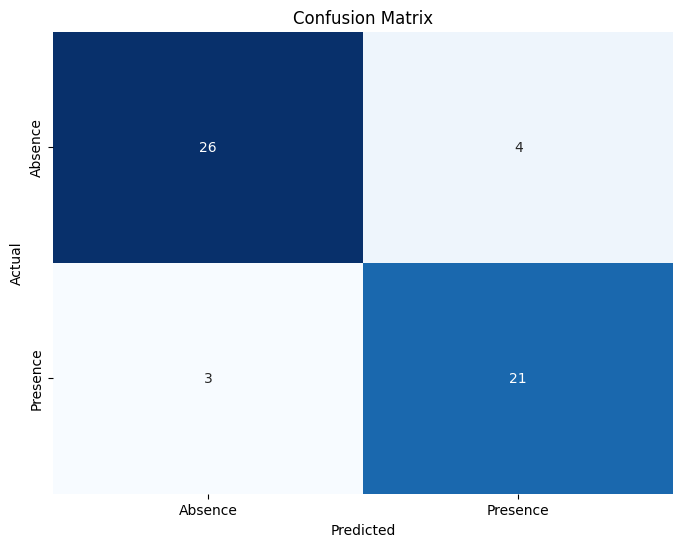

In [ ]:
cm=confusion_matrix(y_test,model.predict(X_test))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Absence', 'Presence'], yticklabels=['Absence', 'Presence'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

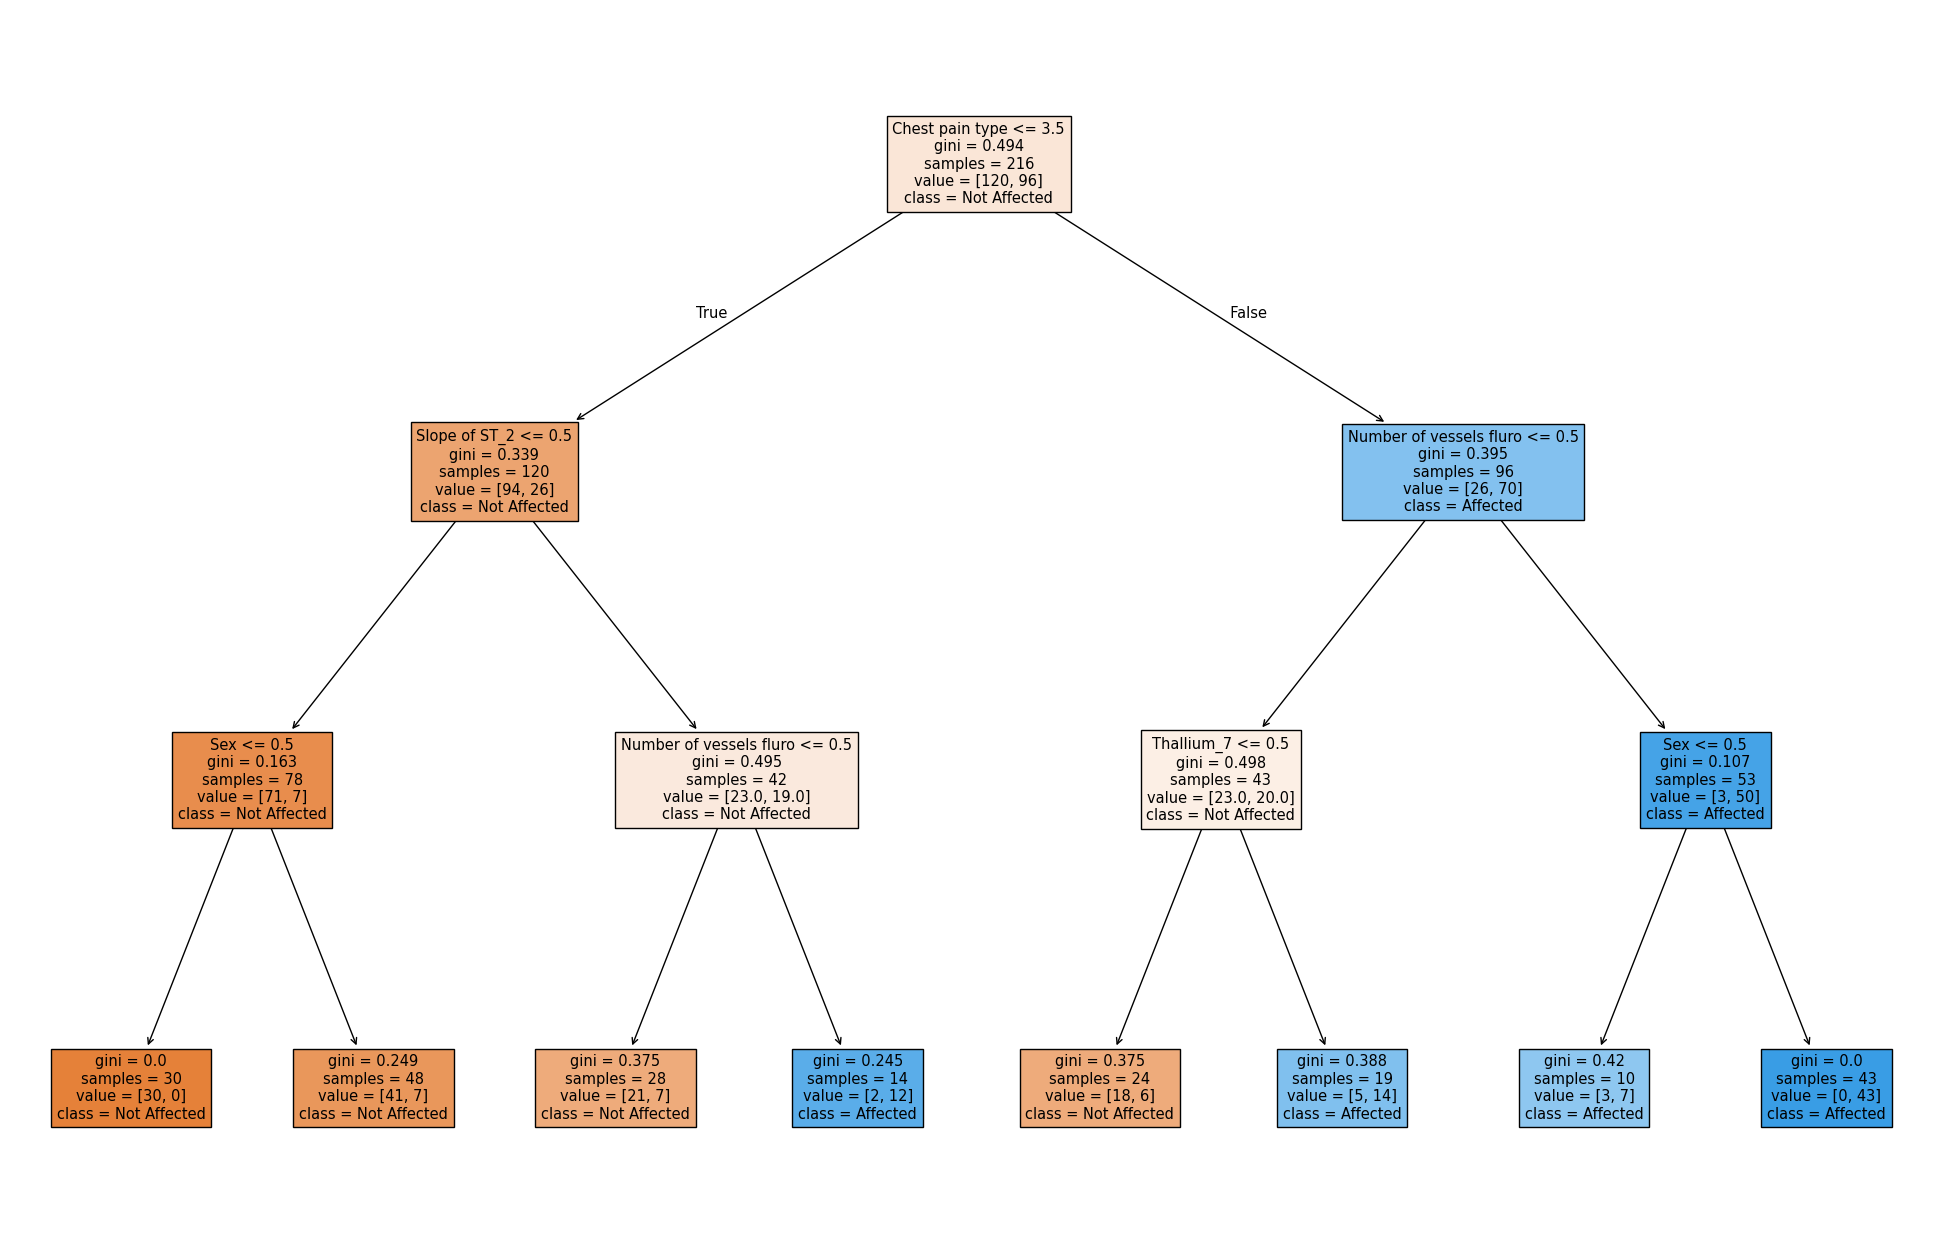

In [ ]:
fig= plt.figure(figsize=(25,16))
dtree = plot_tree(clf,filled=True,feature_names=X_train.columns,class_names=['Not Affected', 'Affected'],max_depth=6)

In [ ]:
print(classification_report(y_test,model.predict(X_test)))


              precision    recall  f1-score   support

     Absence       0.90      0.87      0.88        30
    Presence       0.84      0.88      0.86        24

    accuracy                           0.87        54
   macro avg       0.87      0.87      0.87        54
weighted avg       0.87      0.87      0.87        54



* Interpretation :- According to the classification report we get the value of precision absence is 90% and present is 84%. (When the model predicts Absence, it is correct 90% of the time.)
==========================================================

* And recall absence is 87% and present is 88%.
(The model correctly identifies 83% of all actual Absence cases.)
=========================================================


* And the f1-score of absence is 88% and present is 86%.
(Balanced performance between precision and recall for Absence).
=======

In [ ]:
df.value_counts()

Age        Sex  Chest pain type  BP         Cholesterol  FBS over 120  Max HR    Exercise angina  ST depression  Number of vessels fluro  Heart Disease  Thallium_6  Thallium_7  EKG results_1  EKG results_2  Slope of ST_2  Slope of ST_3
 2.481986  1    4.0              -0.355409   1.169459    0             0.532904  1                -0.918565      3                        Presence       0           0           0              1              0              0                1
-2.797275  1    2.0              -0.057210  -0.941125    0             2.262800  0                -0.918565      0                        Absence        0           0           0              1              0              0                1
-2.247352  0    2.0              -0.772888  -0.814490    0             1.830326  0                -0.306188      0                        Absence        0           0           0              0              0              0                1
           1    1.5              -0.772888  -1.405453    0             1.051873  0                -0.918565      0                        Absence        0           0           0              1              0              0                1
-2.137367  0    4.0               0.419909  -1.384347    0             1.397852  0                 0.306188      0                        Absence        0           0           0              0              0              0                1
                                                                                                                                                                                                                                              ..
-1.477460  0    3.0              -1.130727   0.409649    0             0.965378  1                -0.918565      0                        Absence        0           0           0              1              0              0                1
                2.0              -0.057210  -0.941125    0             0.965378  0                 0.306188      0                        Absence        0           0           0              1              0              0                1
                                 -0.295769   1.211670    0             0.576151  0                -0.918565      0                        Absence        0           0           0              0              0              0                1
                                 -1.548206  -1.067760    0             0.792388  0                -0.918565      1                        Absence        0           0           0              0              0              0                1
-1.587444  1    4.0               1.254867  -0.540114    0             1.354605  0                -0.918565      0                        Presence       0           1           0              0              0              0                1
Name: count, Length: 270, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train,y_train)
log_pred = log_model.predict(X_test)

#Decision Tree
dt_model = DecisionTreeClassifier(max_depth=5,random_state=42)
dt_model.fit(X_train,y_train)
dt_pred = dt_model.predict(X_test)

#Random Forest
rf_model = RandomForestClassifier(n_estimators=100,random_state=42)
rf_model = rf_model.fit(X_train,y_train)
rf_pred = rf_model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
def evaluate_model(y_test,y_pred):
  return {
      'accuracy':accuracy_score(y_test,y_pred),
      'precision':precision_score(y_test,y_pred, pos_label='Presence'),
      'recall':recall_score(y_test,y_pred, pos_label='Presence'),
      'f1_score':f1_score(y_test,y_pred, pos_label='Presence')

  }

results = {
    'Logistic Regression':evaluate_model(y_test,log_pred),
    'Decision Tree':evaluate_model(y_test,dt_pred),
    'Random Forest':evaluate_model(y_test,rf_pred)
}

In [ ]:
results_df = pd.DataFrame(results).T
results_df

,accuracy,precision,recall,f1_score
Logistic Regression,0.870370,0.840000,0.875000,0.857143
Decision Tree,0.851852,0.807692,0.875000,0.840000
Random Forest,0.833333,0.800000,0.833333,0.816327


In [ ]:
from sklearn.svm import SVC

clf= SVC(kernel='linear',C=0.1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print('Accuracy: ',accuracy_score(y_test,y_pred))


Accuracy:  0.8518518518518519


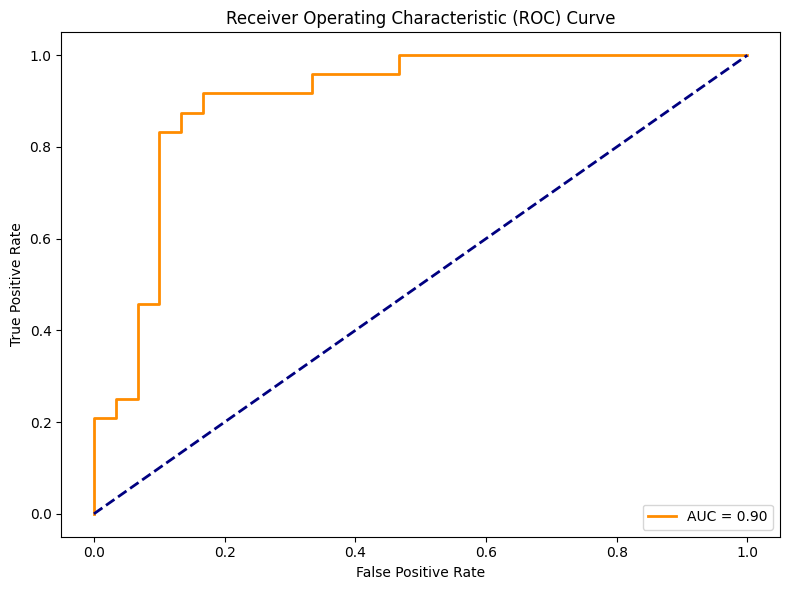

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label='Presence')
roc_auc= auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

AUC valur is : 0.90
===================================

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

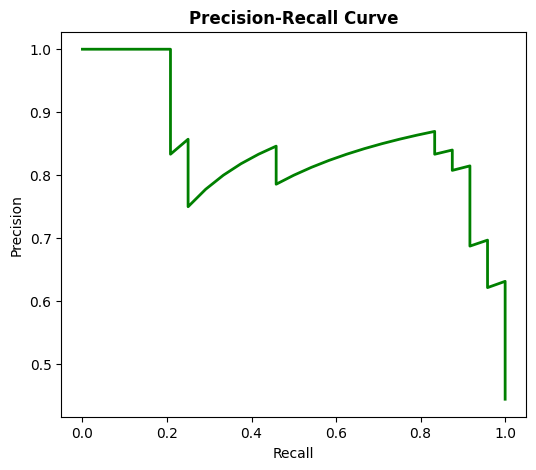

In [ ]:
precision,recall,thresholds=precision_recall_curve(y_test,y_pred_proba, pos_label='Presence')
plt.figure(figsize=(6,5))
plt.plot(recall,precision,color="green",lw=2)
plt.title('Precision-Recall Curve',fontweight='bold')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd

df_nn = pd.read_csv('/content/sample_data/Heart_Disease_Prediction.csv')

df_nn['Heart Disease'] = df_nn['Heart Disease'].apply(lambda x: 1 if x == 'Presence' else 0)

x = df_nn.drop(columns=['Heart Disease']).values
y = df_nn['Heart Disease'].values

model = Sequential()
model.add(Dense(16, input_shape=(x.shape[1],), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x, y, epochs=150, batch_size=10, verbose=0)
_, accuracy = model.evaluate(x, y, verbose=0)
print('Accuracy: %.2f' % (accuracy * 100))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Accuracy: 85.93


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


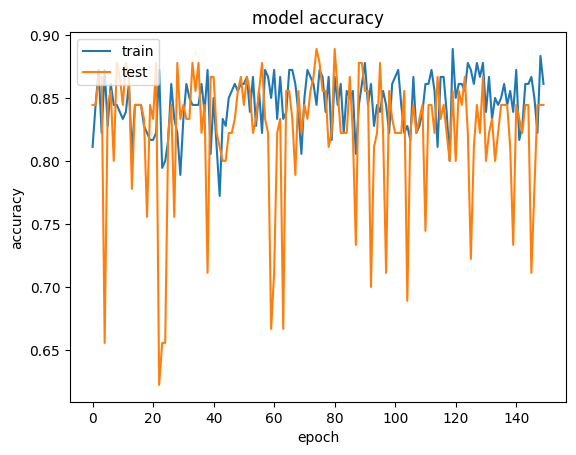

In [ ]:
import matplotlib.pyplot as plt
history=model.fit(x,y,validation_split=0.33,epochs=150,batch_size=10,verbose=0)
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

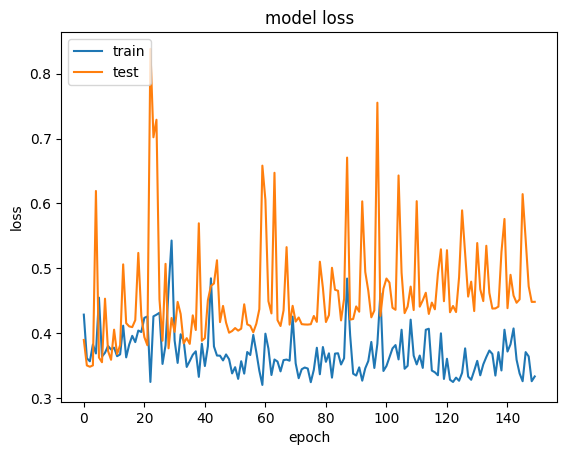

In [ ]:
#summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

DAY 15  #2 Neural Network
================

In [ ]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

dataset=loadtxt('/content/sample_data/pima-indians-diabetes.data.csv',delimiter=',')
x=dataset[:,0:8]
y=dataset[:,8]

model=Sequential()
model.add(Dense(16,input_shape=(8,),activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x,y,epochs=150,batch_size=10)
_,accuracy=model.evaluate(x,y)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4194 - loss: 4.2027
Epoch 2/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5706 - loss: 1.4273
Epoch 3/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6292 - loss: 0.9860
Epoch 4/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5730 - loss: 0.9195
Epoch 5/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6104 - loss: 0.7951
Epoch 6/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6637 - loss: 0.7265
Epoch 7/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6314 - loss: 0.7318
Epoch 8/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6281 - loss: 0.6921
Epoch 9/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6262 - loss: 0.7183
Epoch 10/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6796 - loss: 0.6512
Epoch 11/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6816 - loss: 0.6200
Epoch 12/150
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6846 - lo

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


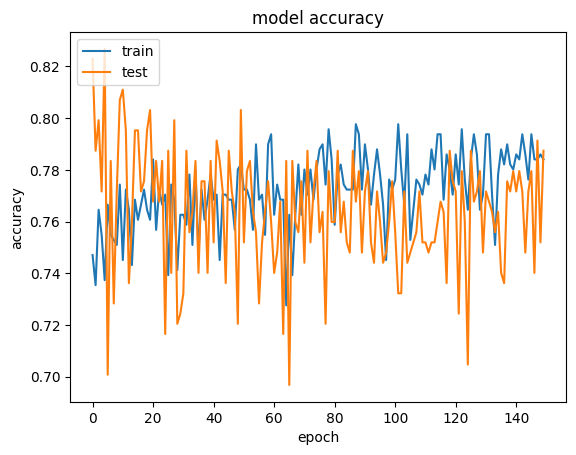

In [ ]:
import matplotlib.pyplot as plt
history=model.fit(x,y,validation_split=0.33,epochs=150,batch_size=10,verbose=0)
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

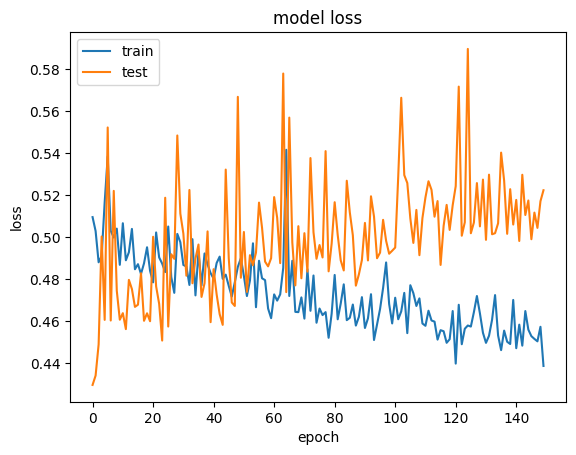

In [ ]:
#summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
df1

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   6       767 non-null    int64  
 1   148     767 non-null    int64  
 2   72      767 non-null    int64  
 3   35      767 non-null    int64  
 4   0       767 non-null    int64  
 5   33.6    767 non-null    float64
 6   0.627   767 non-null    float64
 7   50      767 non-null    int64  
 8   1       767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df1.shape

(767, 9)

In [ ]:
df1.describe()

,6,148,72,35,0,33.6,0.627,50,1
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df1.value_counts()

6   148  72  35  0    33.6  0.627  50  1
17  163  72  41  114  40.9  0.817  47  1    1
0   57   60  0   0    21.7  0.735  67  0    1
    67   76  0   0    45.3  0.194  46  0    1
    73   0   0   0    21.1  0.342  25  0    1
    74   52  10  36   27.8  0.269  22  0    1
                                           ..
    98   82  15  84   25.2  0.299  22  0    1
    97   64  36  100  36.8  0.600  25  0    1
    95   85  25  36   37.4  0.247  24  1    1
         80  45  92   36.5  0.330  26  0    1
         64  39  105  44.6  0.366  22  0    1
Name: count, Length: 767, dtype: int64

In [ ]:
df1.isnull().sum()

,0
6,0
148,0
72,0
35,0
0,0
33.6,0
0.627,0
50,0
1,0


In [ ]:
cat1 = df.select_dtypes(include=['number']).columns.tolist()
print("Numerical columns identified :\n", numerical_cols)

Numerical columns identified :
 ['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium']


In [ ]:
from numpy import exp, array, random, dot

class NeuralNetwork():
    def __init__(self):
        # Seed the random number generator, so it generates the same numbers
        # every time the program runs.
        random.seed(1)

        # We model a single neuron, with 3 input connections and 1 output connection
        # we assign random weights to a 3 x 1 matrix, with values in the range -1 to 1
        # and mean 0.
        self.synaptic_weights = 2 * random.random((3, 1)) - 1

    # The Sigmoid function, which describes as S shaped curve.
    # We pass the weighted sum of the inputs through this function to
    # normalise them between 0 and 1
    def __sigmoid(self, x):
        return 1 / (1 + exp(-x))

    # The derivative of the Sigmoid function
    # This is the gradient of the Sigmoid curve.
    # It indicates how confident we are about the existing weight.
    def __sigmoid_derivative(self, x):
        return x * (1 - x)

    # We train the neural network through a process of trial and error.
    # Adjusting the synaptic weights each time.
    def train(self, training_set_inputs, training_set_outputs, number_of_training_iterations):
        for iteration in range(number_of_training_iterations):
            # Pass the training set through our neural network (our single neuron).
            output = self.think(training_set_inputs)

            # Calculate the error (The difference between the desired output
            # and the predicted output).
            error = training_set_outputs - output

            # Multiply the error by the input and again by the gradient of the Sigmoid curve.
            # This means less confident weights are adjusted more.
            # This means inputs, which are zero do not cause changes to the weights.
            adjustments = dot(training_set_inputs.T, error * self.__sigmoid_derivative(output))

            # Adjust the weights.
            self.synaptic_weights += adjustments

    # The neural network thinks:
    def think(self, inputs):
        # Pass inputs through our neural network (our single neuron).
        return self.__sigmoid(dot(inputs, self.synaptic_weights))



In [ ]:
# Intialise a single neuron neural network.
neural_network = NeuralNetwork()

print("Random starting synaptic weights: ")
print(neural_network.synaptic_weights)

# The training set. We have 4 examples, each consisting of 3 input values
# and 1 output value.
training_set_inputs = array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
training_set_outputs = array([[0, 1, 1, 0]]).T

# Train the neural network using a training set.
# Do it 10,000 times and make small adjustments each time.
neural_network.train(training_set_inputs, training_set_outputs, 10000)

print("New synaptic weights after training: ")
print(neural_network.synaptic_weights)

Random starting synaptic weights: 
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
New synaptic weights after training: 
[[ 9.67299303]
 [-0.2078435 ]
 [-4.62963669]]
